# Customer Churn Analysis

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [29]:
# !pip3 install mysql-connector-python

In [30]:
import mysql.connector as sql
import pandas as pd
db = sql.connect(host='localhost',
                 user='root',
                 passwd = 'live to love',
                 database = 'telecom')
crsr = db.cursor()
query = "SELECT * FROM churn;"
df = pd.read_sql(query, db)

# df.info()
db.close()

In [33]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [39]:
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [41]:
df.dropna(inplace=True)
# df.drop("customerID",axis="columns",inplace=True)


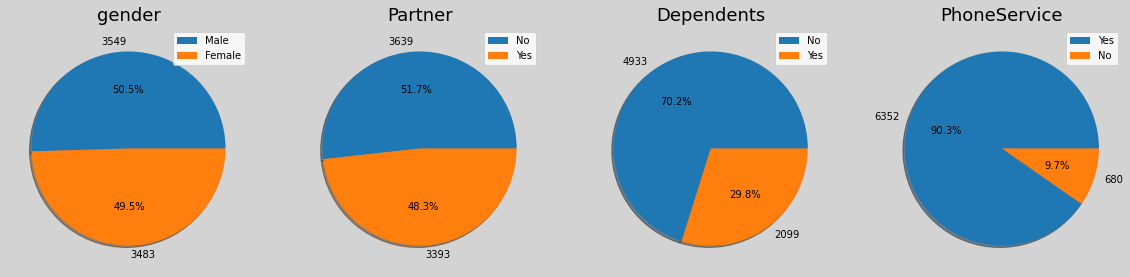

In [43]:
categ_columns = list(df.select_dtypes(include = ['object']).columns)

fig, axes = plt.subplots(1, 4, figsize=(20, 12), facecolor="lightgray")

for i, column in enumerate(categ_columns[:4]):
    ax = axes[i]
    d = df[column].value_counts()
    ax.pie(d, labels=d.values,autopct="%1.1f%%",shadow=True)
    ax.set_title(column,size=18)
    ax.legend(d.index)

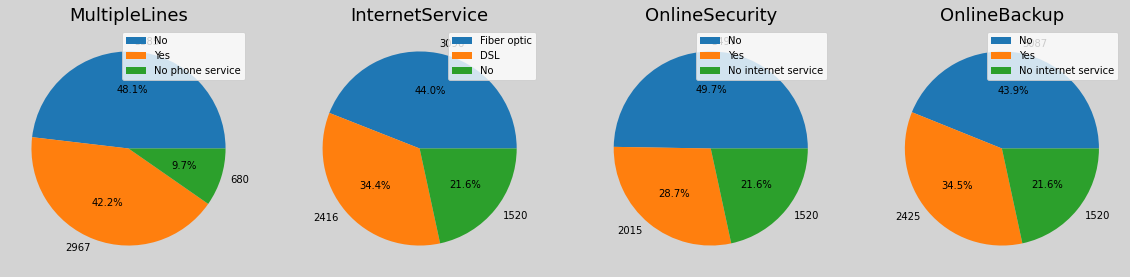

In [45]:
fig, axes = plt.subplots(1, 4, figsize=(20, 12), facecolor="lightgray")


for i, column in enumerate(categ_columns[4:8]):
    ax = axes[i]
    d = df[column].value_counts()
    ax.pie(d, labels=d.values,autopct="%1.1f%%")
    ax.set_title(column,size=18)
    ax.legend(d.index,loc="best")

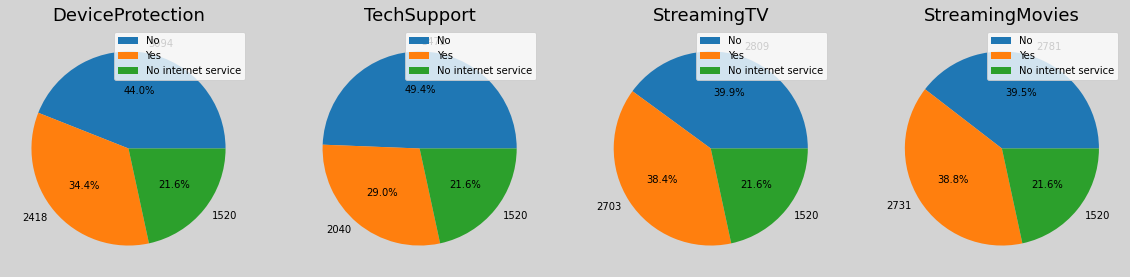

In [46]:
fig, axes = plt.subplots(1, 4, figsize=(20, 12), facecolor="lightgray")

for i, column in enumerate(categ_columns[8:12]):
    ax = axes[i]
    d = df[column].value_counts()
    ax.pie(d, labels=d.values,autopct="%1.1f%%")
    ax.set_title(column,size=18)
    ax.legend(d.index)

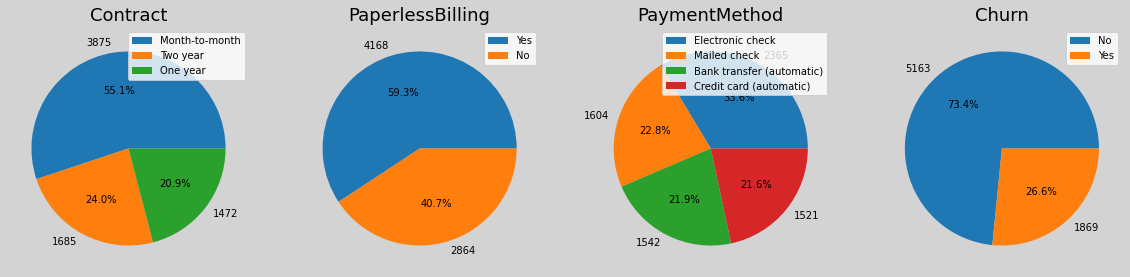

In [47]:
fig, axes = plt.subplots(1, 4, figsize=(20, 12), facecolor="lightgray")

for i, column in enumerate(categ_columns[12:]):

        ax = axes[i]
        d = df[column].value_counts()
        ax.pie(d, labels=d.values,autopct="%1.1f%%")
        ax.set_title(column,size=18)
        ax.legend(d.index)

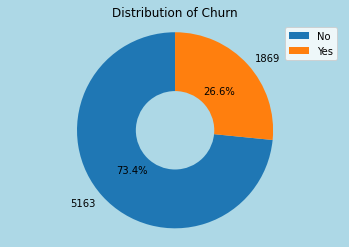

In [48]:
fig, ax = plt.subplots(facecolor="lightblue")
d = df["Churn"].value_counts()
ax.pie(d,autopct='%1.1f%%', startangle=90,labels=d.values)
ax.legend(d.index)
ax.set_title("Distribution of Churn")
centre_circle = plt.Circle((0,0),0.4,fc='lightblue')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal');

[Text(0.5, 0, 'Count')]

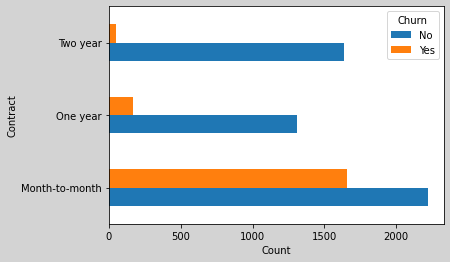

In [50]:
fig , ax = plt.subplots(facecolor="lightgray")
pd.crosstab(df["Contract"],df["Churn"]).plot(kind="barh",ax=ax)
ax.set(xlabel="Count")

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

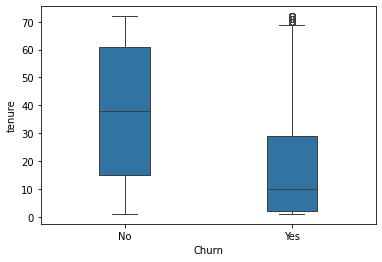

In [51]:
sns.boxplot(data=df,x="Churn",y="tenure",width=0.3)

[Text(0.5, 0, 'Count')]

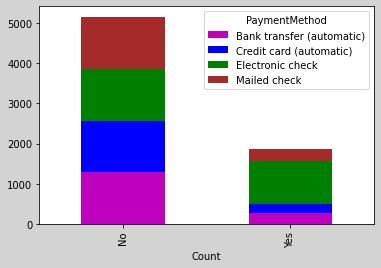

In [53]:
fig , ax = plt.subplots(facecolor="lightgray")
pd.crosstab(df["Churn"],df["PaymentMethod"]).plot(kind="bar",color=["m","b","green","brown"],ax=ax,stacked=True,)
ax.set(xlabel="Count")

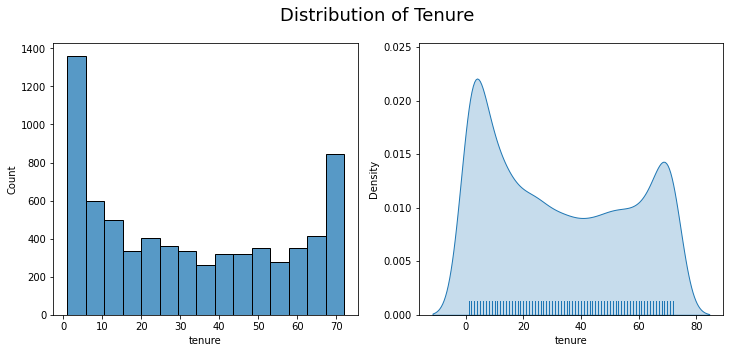

In [55]:
fig , ax = plt.subplots(1,2,figsize=(12,5))
sns.histplot(df["tenure"],ax=ax[0])
sns.kdeplot(df["tenure"],fill=True,ax=ax[1])
sns.rugplot(df["tenure"],height=0.05)

fig.suptitle("Distribution of Tenure",size=18);

Text(0.5, 0.98, 'Distribution of TotalCharges')

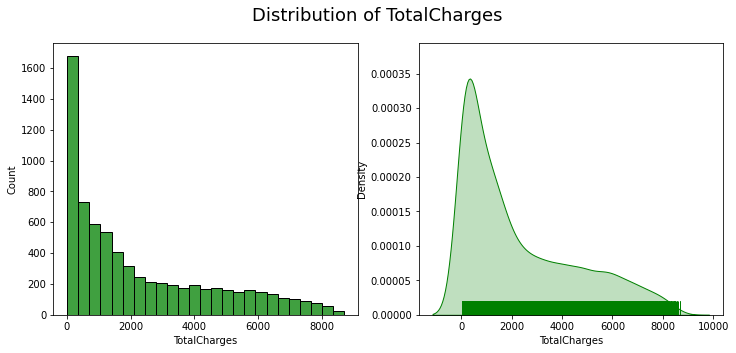

In [56]:
fig , ax = plt.subplots(1,2,figsize=(12,5))
sns.histplot(df["TotalCharges"],ax=ax[0],color='Green')
sns.kdeplot(df["TotalCharges"],fill=True,ax=ax[1],color='Green')
sns.rugplot(df["TotalCharges"],height=0.05,color='Green')

fig.suptitle("Distribution of TotalCharges",size=18)

Text(0.5, 0.98, 'Distribution of MonthlyCharges')

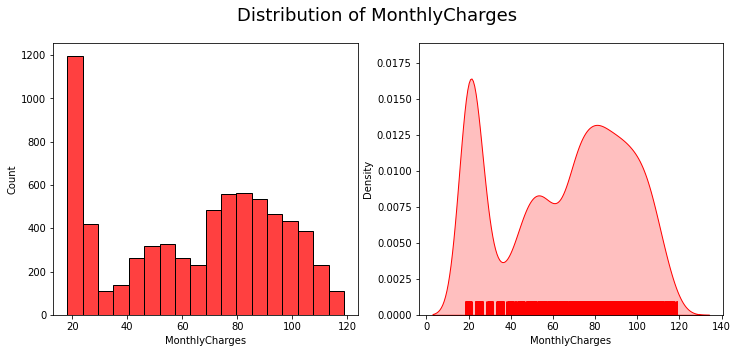

In [57]:
fig , ax = plt.subplots(1,2,figsize=(12,5))
sns.histplot(df["MonthlyCharges"],ax=ax[0],color='Red')
sns.kdeplot(df["MonthlyCharges"],fill=True,ax=ax[1],color='Red')
sns.rugplot(df["MonthlyCharges"],height=0.05,color='Red')

fig.suptitle("Distribution of MonthlyCharges",size=18)